In [50]:

# View pandas dataframes in-notebook without printing them last
from IPython.display import display, HTML

import json
import glob
import pandas as pd
from pandas import json_normalize

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score #average_precision_score

In [2]:
pd.__version__

'1.0.3'

In [3]:
plotDF = pd.read_csv("QfO_vertebrates_s100_sencha_translate_summaries.csv", index_col=0)

In [4]:
#plotDF["peptide_reference"] = plotDF["peptide_bloom_filter"].str.extract

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

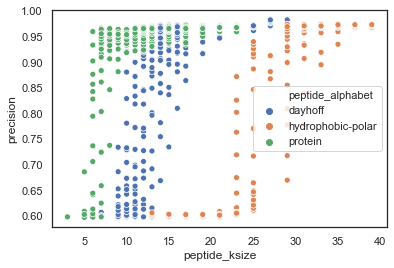

In [6]:

HsapiensDF = plotDF[(plotDF["species"] == "Homo sapiens")]
sns.scatterplot(x="peptide_ksize", y="precision", data=HsapiensDF, hue="peptide_alphabet" )#, style="jaccard_threshold", legend="full")

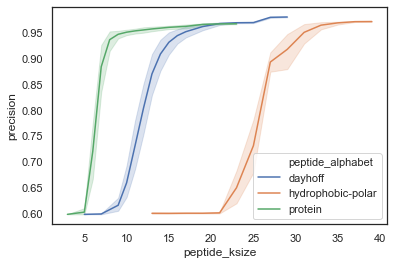

In [7]:
sns.lineplot(x="peptide_ksize", y="precision", data=HsapiensDF, hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

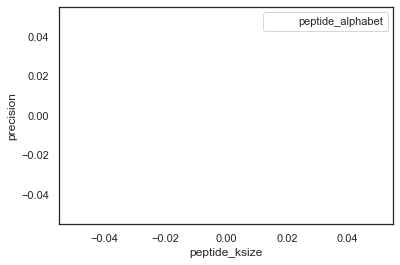

In [8]:
sns.lineplot(x="peptide_ksize", y="precision", data=plotDF[(plotDF["species"] == "Bos_taurus")], hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

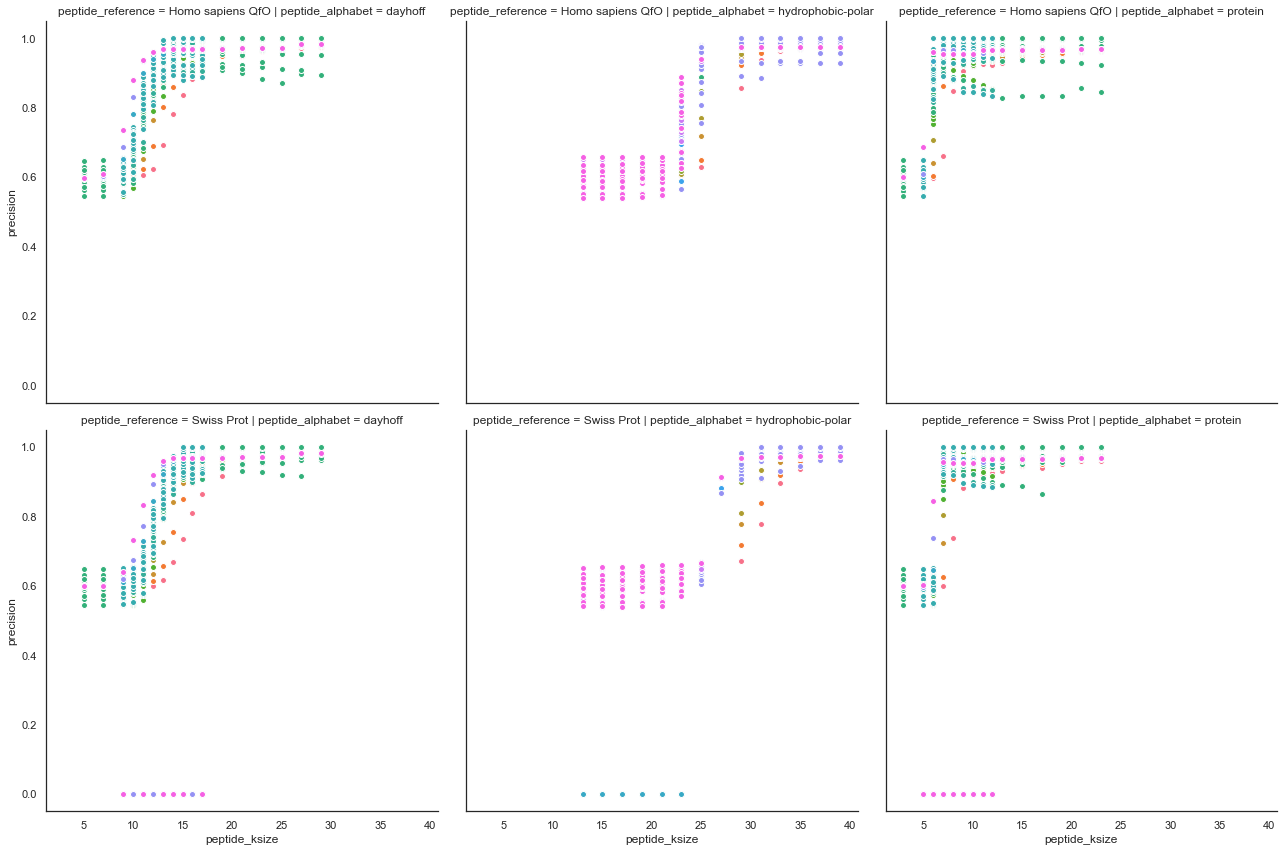

In [9]:
#g = sns.FacetGrid(plotDF, row="peptide_reference", col="jaccard_threshold", hue="peptide_alphabet", legend_out= True, height=6, aspect=1) #, style="jaccard_threshold"
g = sns.FacetGrid(plotDF, row="peptide_reference", col="peptide_alphabet", hue="jaccard_threshold", legend_out= True, height=6, aspect=1) #, style="jaccard_threshold"
g = g.map(plt.scatter, "peptide_ksize", "precision", edgecolor="w")

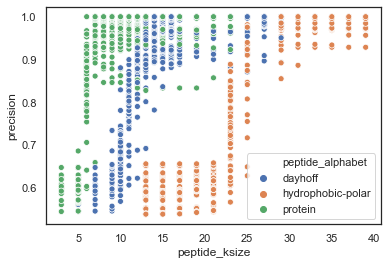

In [10]:
sns.scatterplot(x="peptide_ksize", y="precision", data=plotDF.loc[plotDF["peptide_reference"] == "Homo sapiens QfO"], hue="peptide_alphabet")#, style="jaccard_threshold", legend=False)

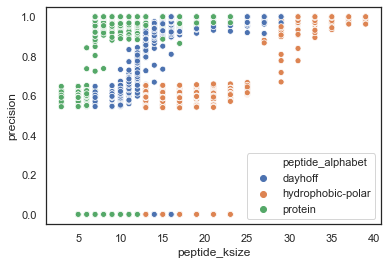

In [11]:
sns.scatterplot(x="peptide_ksize", y="precision", data=plotDF.loc[plotDF["peptide_reference"] == "Swiss Prot"], hue="peptide_alphabet")#, style="jaccard_threshold", legend=False)


In [12]:
# let's grab just default thresholds
#df[df['first_name'].notnull() & (df['nationality'] == "USA")]
#defaultThresholds=
proteinDF = plotDF[(plotDF["jaccard_threshold"] == 0.5) & (plotDF['peptide_alphabet'] =="protein")]
dayhoffDF = plotDF[(plotDF["jaccard_threshold"] == 0.5) & (plotDF['peptide_alphabet'] =="dayhoff")]
hpDF = plotDF[(plotDF["jaccard_threshold"] == 0.8) & (plotDF['peptide_alphabet'] =="hydrophobic-polar")]
defaultThresholds = pd.concat([proteinDF, dayhoffDF, hpDF])


#in ["protein", "dayhoff"])]
#dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]


In [13]:
defaultThresholds

species  divergence_from_human_mya   peptide_alphabet  \
150           Bos taurus                       96.0            protein   
152           Bos taurus                       96.0            protein   
156           Bos taurus                       96.0            protein   
160           Bos taurus                       96.0            protein   
164           Bos taurus                       96.0            protein   
...                  ...                        ...                ...   
4188  Xenopus tropicalis                      351.8  hydrophobic-polar   
4189  Xenopus tropicalis                      351.8  hydrophobic-polar   
4190  Xenopus tropicalis                      351.8  hydrophobic-polar   
4191  Xenopus tropicalis                      351.8  hydrophobic-polar   
4192  Xenopus tropicalis                      351.8  hydrophobic-polar   

     peptide_reference  peptide_ksize  \
150   Homo sapiens QfO              3   
152   Homo sapiens QfO              5   
156   Homo sapiens QfO              6   
160   Homo sapiens QfO              7   
164   Homo sapiens QfO              8   
...                ...            ...   
4188        Swiss Prot             31   
4189        Swiss Prot             33   
4190        Swiss Prot             35   
4191        Swiss Prot             37   
4192        Swiss Prot             39   

                                   peptide_bloom_filter  jaccard_threshold  \
150   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
152   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
156   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
160   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
164   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
...                                                 ...                ...   
4188  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4189  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4190  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4191  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4192  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   

      true_positives  true_negatives  false_positives  false_negatives  \
150              495           181.0              319              5.0   
152              495           181.0              319              5.0   
156              380           438.0               62            120.0   
160              238           492.0                8            262.0   
164              206           493.0                7            294.0   
...              ...             ...              ...              ...   
4188              66           500.0                0            434.0   
4189              63           500.0                0            437.0   
4190              60           500.0                0            440.0   
4191              59           500.0                0            441.0   
4192              59           500.0                0            441.0   

      precision  recall  F1_score  
150    0.608108   0.990  0.753425  
152    0.608108   0.990  0.753425  
156    0.859729   0.760  0.806794  
160    0.967480   0.476  0.638070  
164    0.967136   0.412  0.577840  
...         ...     ...       ...  
4188   1.000000   0.132  0.233216  
4189   1.000000   0.126  0.223801  
4190   1.000000   0.120  0.214286  
4191   1.000000   0.118  0.211091  
4192   1.000000   0.118  0.211091  

[1171 rows x 14 columns]

In [14]:
hpDF

species  divergence_from_human_mya   peptide_alphabet  \
89            Bos taurus                       96.0  hydrophobic-polar   
93            Bos taurus                       96.0  hydrophobic-polar   
97            Bos taurus                       96.0  hydrophobic-polar   
101           Bos taurus                       96.0  hydrophobic-polar   
105           Bos taurus                       96.0  hydrophobic-polar   
...                  ...                        ...                ...   
4188  Xenopus tropicalis                      351.8  hydrophobic-polar   
4189  Xenopus tropicalis                      351.8  hydrophobic-polar   
4190  Xenopus tropicalis                      351.8  hydrophobic-polar   
4191  Xenopus tropicalis                      351.8  hydrophobic-polar   
4192  Xenopus tropicalis                      351.8  hydrophobic-polar   

     peptide_reference  peptide_ksize  \
89    Homo sapiens QfO             13   
93    Homo sapiens QfO             15   
97    Homo sapiens QfO             17   
101   Homo sapiens QfO             19   
105   Homo sapiens QfO             21   
...                ...            ...   
4188        Swiss Prot             31   
4189        Swiss Prot             33   
4190        Swiss Prot             35   
4191        Swiss Prot             37   
4192        Swiss Prot             39   

                                   peptide_bloom_filter  jaccard_threshold  \
89    output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
93    output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
97    output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
101   output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
105   output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
...                                                 ...                ...   
4188  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4189  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4190  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4191  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4192  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   

      true_positives  true_negatives  false_positives  false_negatives  \
89               446           203.0              297             54.0   
93               446           204.0              296             54.0   
97               444           204.0              296             56.0   
101              444           215.0              285             56.0   
105              442           230.0              270             58.0   
...              ...             ...              ...              ...   
4188              66           500.0                0            434.0   
4189              63           500.0                0            437.0   
4190              60           500.0                0            440.0   
4191              59           500.0                0            441.0   
4192              59           500.0                0            441.0   

      precision  recall  F1_score  
89     0.600269   0.892  0.717619  
93     0.601078   0.892  0.718196  
97     0.600000   0.888  0.716129  
101    0.609053   0.888  0.722539  
105    0.620787   0.884  0.729373  
...         ...     ...       ...  
4188   1.000000   0.132  0.233216  
4189   1.000000   0.126  0.223801  
4190   1.000000   0.120  0.214286  
4191   1.000000   0.118  0.211091  
4192   1.000000   0.118  0.211091  

[339 rows x 14 columns]

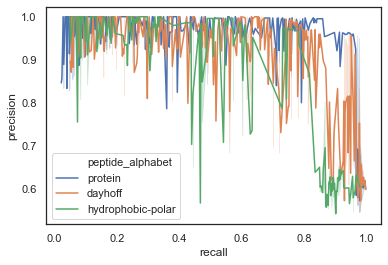

In [15]:
sns.lineplot(x="recall", y="precision", data=defaultThresholds, hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

In [16]:
#g = sns.FacetGrid(plotDF, row="peptide_reference", col="jaccard_threshold", hue="peptide_alphabet", legend_out= True, height=6, aspect=1) #, style="jaccard_threshold"
#g = g.map(plt.plot, "peptide_ksize", "precision", edgecolor="w")

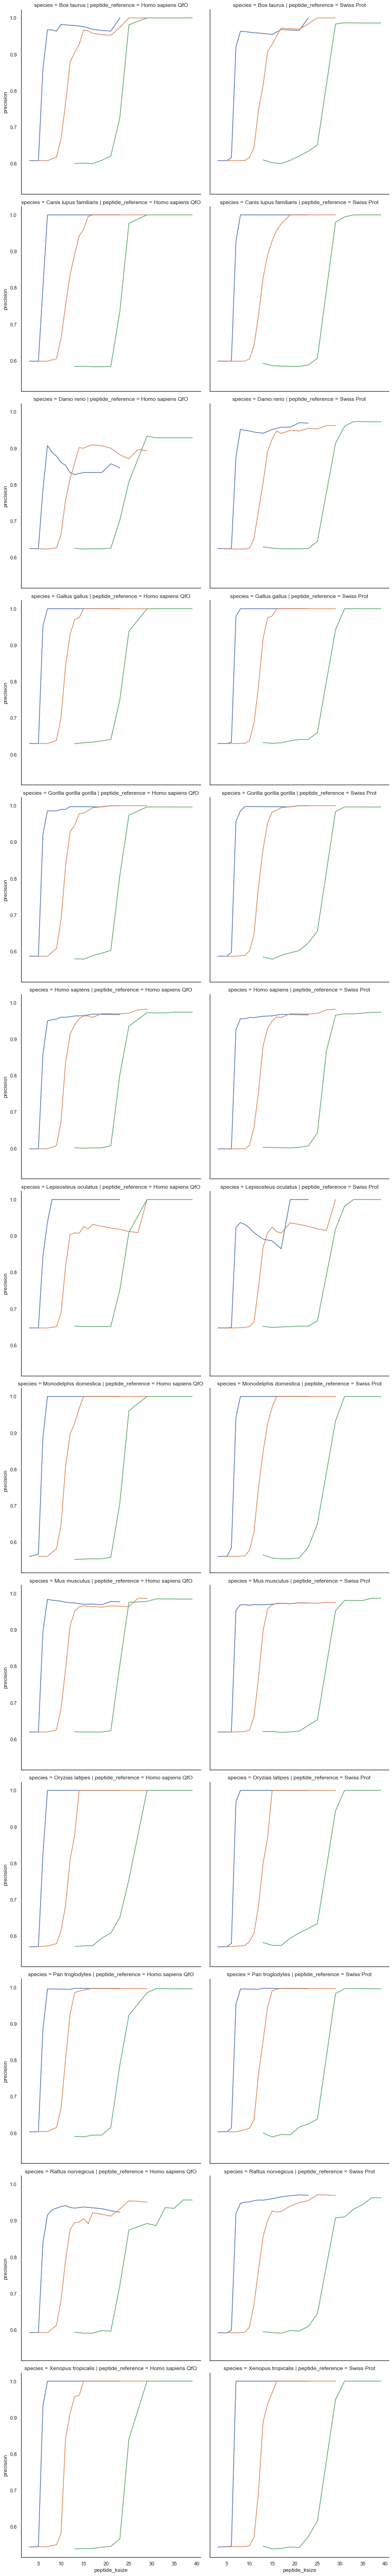

In [17]:
g = sns.FacetGrid(defaultThresholds, row= "species", col="peptide_reference", hue="peptide_alphabet", legend_out= True, height=6, aspect=1) #, style="jaccard_threshold"
#g = g.map(plt.scatter, "peptide_ksize", "precision", edgecolor="w")
g = g.map(plt.plot, "peptide_ksize", "precision") #, edgecolor="w")

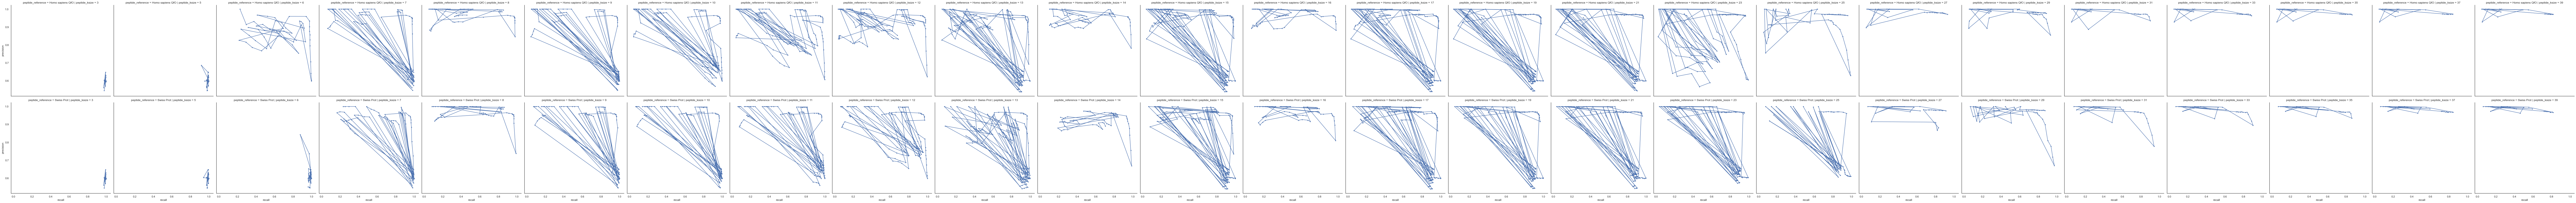

In [18]:
#defaultThresholds=plotDF.loc[plotDF["jaccard_threshold"] == 0.5]
#g = sns.FacetGrid(defaultThresholds,col="peptide_ksize", row= "peptide_reference",height=6, aspect=1)#, height=2)
g = sns.FacetGrid(plotDF,col="peptide_ksize", row= "peptide_reference",height=6, aspect=1)
g = g.map(plt.plot, "recall", "precision", marker=".")
# weird patterns are a result of having all thresholds in same plot - need to break out

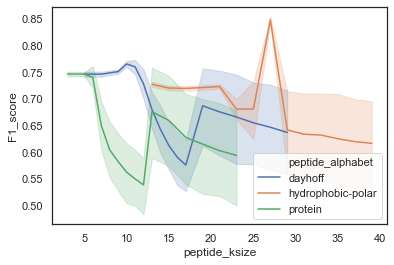

In [19]:
#F1 score vs peptide_ksize
sns.lineplot(x="peptide_ksize", y="F1_score", data=plotDF, hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

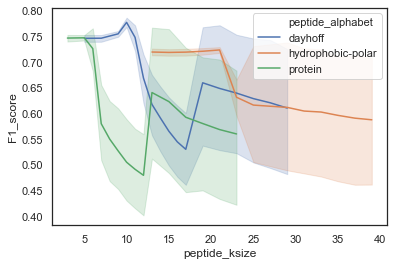

In [20]:
Hsapiens_ref = plotDF.loc[plotDF["peptide_reference"] == "Homo sapiens QfO"]
Sprot_ref = plotDF.loc[plotDF["peptide_reference"] == "Swiss Prot"]
#defaultThresholds=plotDF.loc[plotDF["jaccard_threshold"] == 0.5]
sns.lineplot(x="peptide_ksize", y="F1_score", data=Hsapiens_ref, hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

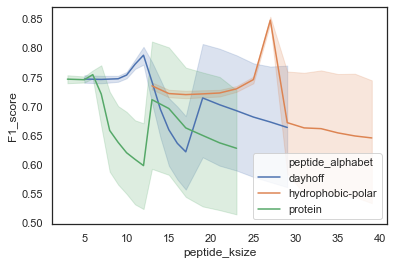

In [21]:
Sprot_ref = plotDF.loc[plotDF["peptide_reference"] == "Swiss Prot"]
#defaultThresholds=plotDF.loc[plotDF["jaccard_threshold"] == 0.5]
sns.lineplot(x="peptide_ksize", y="F1_score", data=Sprot_ref, hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

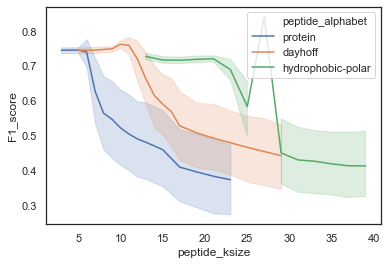

In [22]:
# to do: better select-threshold
sns.lineplot(x="peptide_ksize", y="F1_score", data=defaultThresholds, hue="peptide_alphabet")#, style="jaccard_threshold", legend="full")

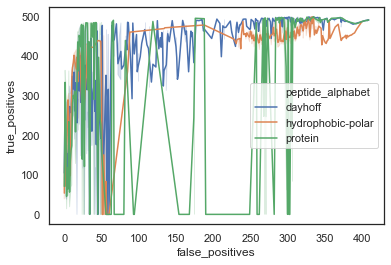

In [23]:
# this isn't very informative - would need rate (%) though here I know total for each - (coding: 500, nc: 500)
sns.lineplot(x="false_positives", y="true_positives", data=Sprot_ref, hue="peptide_alphabet")

In [24]:
defaultThresholds

species  divergence_from_human_mya   peptide_alphabet  \
150           Bos taurus                       96.0            protein   
152           Bos taurus                       96.0            protein   
156           Bos taurus                       96.0            protein   
160           Bos taurus                       96.0            protein   
164           Bos taurus                       96.0            protein   
...                  ...                        ...                ...   
4188  Xenopus tropicalis                      351.8  hydrophobic-polar   
4189  Xenopus tropicalis                      351.8  hydrophobic-polar   
4190  Xenopus tropicalis                      351.8  hydrophobic-polar   
4191  Xenopus tropicalis                      351.8  hydrophobic-polar   
4192  Xenopus tropicalis                      351.8  hydrophobic-polar   

     peptide_reference  peptide_ksize  \
150   Homo sapiens QfO              3   
152   Homo sapiens QfO              5   
156   Homo sapiens QfO              6   
160   Homo sapiens QfO              7   
164   Homo sapiens QfO              8   
...                ...            ...   
4188        Swiss Prot             31   
4189        Swiss Prot             33   
4190        Swiss Prot             35   
4191        Swiss Prot             37   
4192        Swiss Prot             39   

                                   peptide_bloom_filter  jaccard_threshold  \
150   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
152   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
156   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
160   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
164   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
...                                                 ...                ...   
4188  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4189  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4190  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4191  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4192  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   

      true_positives  true_negatives  false_positives  false_negatives  \
150              495           181.0              319              5.0   
152              495           181.0              319              5.0   
156              380           438.0               62            120.0   
160              238           492.0                8            262.0   
164              206           493.0                7            294.0   
...              ...             ...              ...              ...   
4188              66           500.0                0            434.0   
4189              63           500.0                0            437.0   
4190              60           500.0                0            440.0   
4191              59           500.0                0            441.0   
4192              59           500.0                0            441.0   

      precision  recall  F1_score  
150    0.608108   0.990  0.753425  
152    0.608108   0.990  0.753425  
156    0.859729   0.760  0.806794  
160    0.967480   0.476  0.638070  
164    0.967136   0.412  0.577840  
...         ...     ...       ...  
4188   1.000000   0.132  0.233216  
4189   1.000000   0.126  0.223801  
4190   1.000000   0.120  0.214286  
4191   1.000000   0.118  0.211091  
4192   1.000000   0.118  0.211091  

[1171 rows x 14 columns]

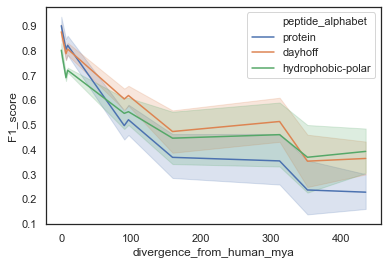

In [25]:
sns.lineplot(x="divergence_from_human_mya", y="F1_score", data=defaultThresholds[defaultThresholds["peptide_reference"]=="Homo sapiens QfO"], hue="peptide_alphabet")

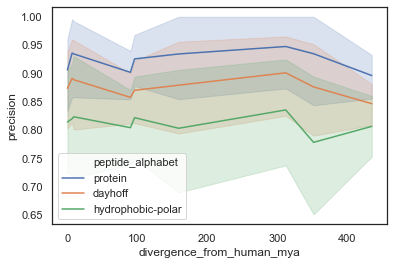

In [26]:
sns.lineplot(x="divergence_from_human_mya", y="precision", data=defaultThresholds[defaultThresholds["peptide_reference"]=="Homo sapiens QfO"], hue="peptide_alphabet")

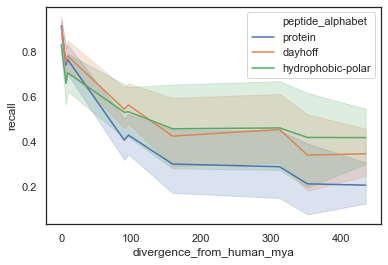

In [27]:
sns.lineplot(x="divergence_from_human_mya", y="recall", data=defaultThresholds[defaultThresholds["peptide_reference"]=="Homo sapiens QfO"], hue="peptide_alphabet")

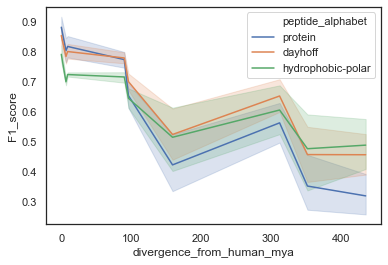

In [28]:
sns.lineplot(x="divergence_from_human_mya", y="F1_score", data=defaultThresholds[defaultThresholds["peptide_reference"]=="Swiss Prot"], hue="peptide_alphabet")

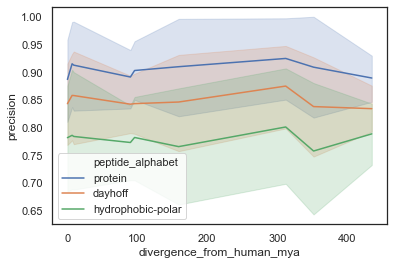

In [29]:
sns.lineplot(x="divergence_from_human_mya", y="precision", data=defaultThresholds[defaultThresholds["peptide_reference"]=="Swiss Prot"], hue="peptide_alphabet")

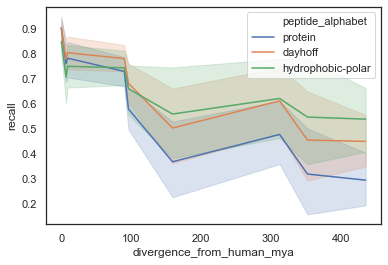

In [30]:
sns.lineplot(x="divergence_from_human_mya", y="recall", data=defaultThresholds[defaultThresholds["peptide_reference"]=="Swiss Prot"], hue="peptide_alphabet")

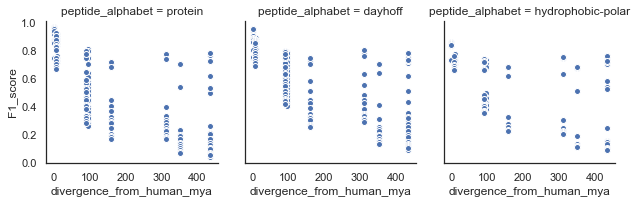

In [31]:
g = sns.FacetGrid(defaultThresholds[defaultThresholds["peptide_reference"]=="Homo sapiens QfO"],col="peptide_alphabet")
#g = g.map(plt.plot, "divergence_from_human_mya","F1_score", marker=".")
g = g.map(plt.scatter, "divergence_from_human_mya", "F1_score", edgecolor="w")#, style="peptide_ksize")

In [32]:
defaultThresholds

species  divergence_from_human_mya   peptide_alphabet  \
150           Bos taurus                       96.0            protein   
152           Bos taurus                       96.0            protein   
156           Bos taurus                       96.0            protein   
160           Bos taurus                       96.0            protein   
164           Bos taurus                       96.0            protein   
...                  ...                        ...                ...   
4188  Xenopus tropicalis                      351.8  hydrophobic-polar   
4189  Xenopus tropicalis                      351.8  hydrophobic-polar   
4190  Xenopus tropicalis                      351.8  hydrophobic-polar   
4191  Xenopus tropicalis                      351.8  hydrophobic-polar   
4192  Xenopus tropicalis                      351.8  hydrophobic-polar   

     peptide_reference  peptide_ksize  \
150   Homo sapiens QfO              3   
152   Homo sapiens QfO              5   
156   Homo sapiens QfO              6   
160   Homo sapiens QfO              7   
164   Homo sapiens QfO              8   
...                ...            ...   
4188        Swiss Prot             31   
4189        Swiss Prot             33   
4190        Swiss Prot             35   
4191        Swiss Prot             37   
4192        Swiss Prot             39   

                                   peptide_bloom_filter  jaccard_threshold  \
150   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
152   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
156   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
160   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
164   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
...                                                 ...                ...   
4188  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4189  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4190  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4191  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4192  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   

      true_positives  true_negatives  false_positives  false_negatives  \
150              495           181.0              319              5.0   
152              495           181.0              319              5.0   
156              380           438.0               62            120.0   
160              238           492.0                8            262.0   
164              206           493.0                7            294.0   
...              ...             ...              ...              ...   
4188              66           500.0                0            434.0   
4189              63           500.0                0            437.0   
4190              60           500.0                0            440.0   
4191              59           500.0                0            441.0   
4192              59           500.0                0            441.0   

      precision  recall  F1_score  
150    0.608108   0.990  0.753425  
152    0.608108   0.990  0.753425  
156    0.859729   0.760  0.806794  
160    0.967480   0.476  0.638070  
164    0.967136   0.412  0.577840  
...         ...     ...       ...  
4188   1.000000   0.132  0.233216  
4189   1.000000   0.126  0.223801  
4190   1.000000   0.120  0.214286  
4191   1.000000   0.118  0.211091  
4192   1.000000   0.118  0.211091  

[1171 rows x 14 columns]

In [33]:
#df.loc[df.reset_index().groupby(['F_Type'])['to_date'].idxmax()]
#bestF1 = defaultThresholds[defaultThresholds.groupby(["species"])["F1_score"]].idxmax()]

bestF1=defaultThresholds.loc[defaultThresholds.groupby(["species", "divergence_from_human_mya", "peptide_alphabet", "peptide_reference"])["F1_score"].idxmax()]

In [34]:
#bF1=bestF1.reset_index()

In [35]:
bestF1

species  divergence_from_human_mya   peptide_alphabet  \
7             Bos taurus                       96.0            dayhoff   
59            Bos taurus                       96.0            dayhoff   
105           Bos taurus                       96.0  hydrophobic-polar   
120           Bos taurus                       96.0  hydrophobic-polar   
156           Bos taurus                       96.0            protein   
...                  ...                        ...                ...   
4098  Xenopus tropicalis                      351.8            dayhoff   
4148  Xenopus tropicalis                      351.8  hydrophobic-polar   
4186  Xenopus tropicalis                      351.8  hydrophobic-polar   
4195  Xenopus tropicalis                      351.8            protein   
4238  Xenopus tropicalis                      351.8            protein   

     peptide_reference  peptide_ksize  \
7     Homo sapiens QfO             10   
59          Swiss Prot             12   
105   Homo sapiens QfO             21   
120         Swiss Prot             13   
156   Homo sapiens QfO              6   
...                ...            ...   
4098        Swiss Prot             11   
4148  Homo sapiens QfO             21   
4186        Swiss Prot             25   
4195  Homo sapiens QfO              5   
4238        Swiss Prot              6   

                                   peptide_bloom_filter  jaccard_threshold  \
7     output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
59    output_simreads/sencha/index/refsprot_t1e9_day...                0.5   
105   output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
120   output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
156   output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
...                                                 ...                ...   
4098  output_simreads/sencha/index/refsprot_t1e9_day...                0.5   
4148  output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
4186  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
4195  output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
4238  output_simreads/sencha/index/refsprot_t1e9_pro...                0.5   

      true_positives  true_negatives  false_positives  false_negatives  \
7                479           262.0              238             21.0   
59               448           350.0              150             52.0   
105              442           230.0              270             58.0   
120              479           194.0              306             21.0   
156              380           438.0               62            120.0   
...              ...             ...              ...              ...   
4098             465           152.0              348             35.0   
4148             448           128.0              372             52.0   
4186             440           225.0              275             60.0   
4195             491            91.0              409              9.0   
4238             490            93.0              407             10.0   

      precision  recall  F1_score  
7      0.668061   0.958  0.787182  
59     0.749164   0.896  0.816029  
105    0.620787   0.884  0.729373  
120    0.610191   0.958  0.745525  
156    0.859729   0.760  0.806794  
...         ...     ...       ...  
4098   0.571956   0.930  0.708302  
4148   0.546341   0.896  0.678788  
4186   0.615385   0.880  0.724280  
4195   0.545556   0.982  0.701429  
4238   0.546265   0.980  0.701503  

[78 rows x 14 columns]

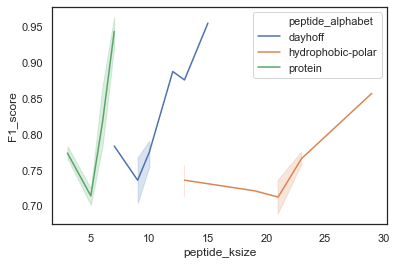

In [36]:
sns.lineplot(data=bestF1.loc[plotDF["peptide_reference"] == "Homo sapiens QfO"], x="peptide_ksize", y="F1_score",hue="peptide_alphabet")

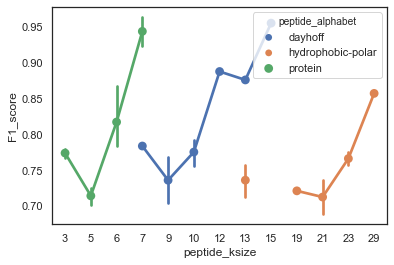

In [37]:
sns.pointplot(data=bestF1.loc[bestF1["peptide_reference"] == "Homo sapiens QfO"], x="peptide_ksize", y="F1_score",hue="peptide_alphabet", edgecolor="w")

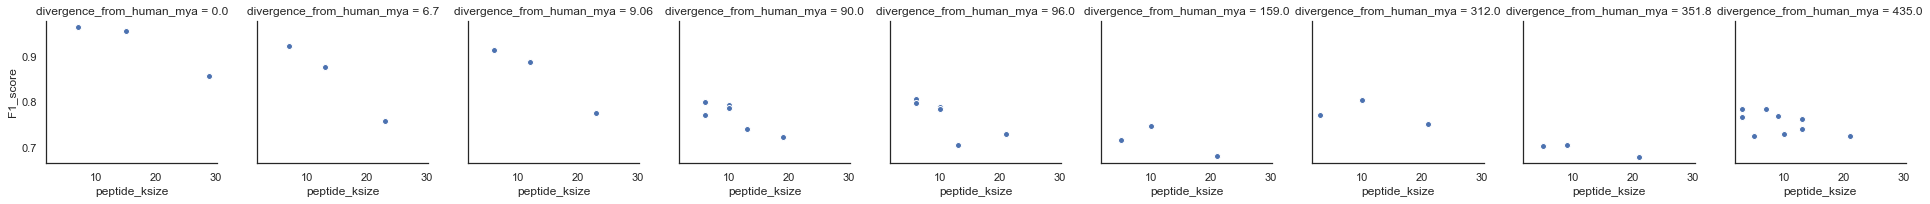

In [38]:
g = sns.FacetGrid(bestF1[bestF1["peptide_reference"]=="Homo sapiens QfO"],col="divergence_from_human_mya")

#g = g.map(plt.plot, "peptide_ksize","F1_score", marker=".")
g = g.map(plt.scatter, "peptide_ksize", "F1_score", edgecolor="w")#, style="peptide_ksize")

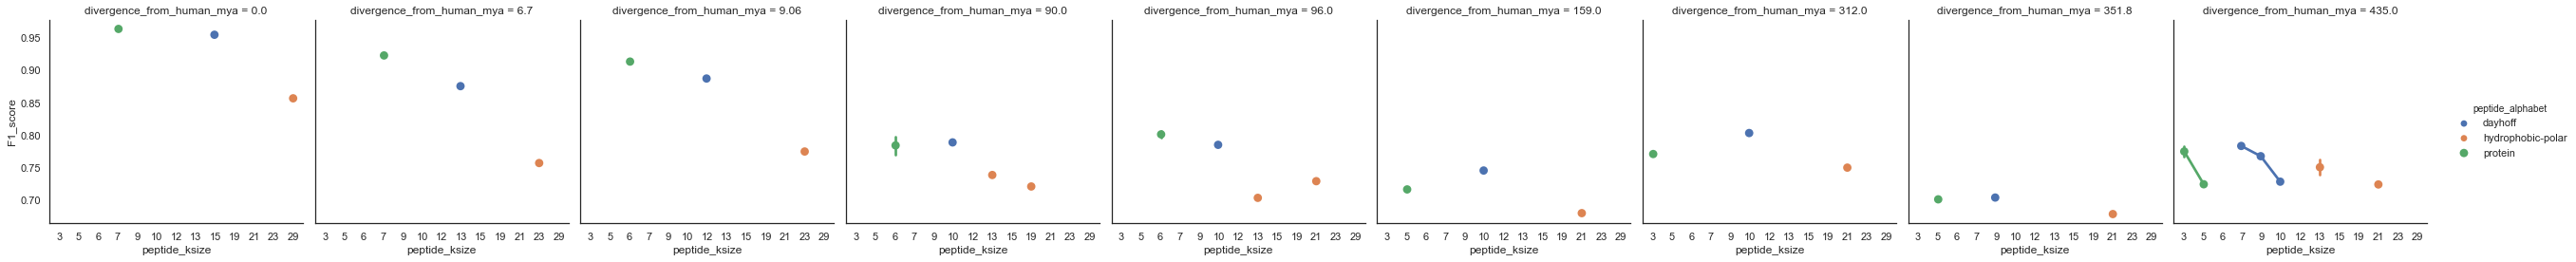

In [39]:
g = sns.catplot(x="peptide_ksize", y="F1_score",hue="peptide_alphabet", col="divergence_from_human_mya",data=bestF1[bestF1["peptide_reference"]=="Homo sapiens QfO"], kind="point", dodge=True, height=4, aspect=1);

## Get "Best" ksize/molecule type for each divergence tiem

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


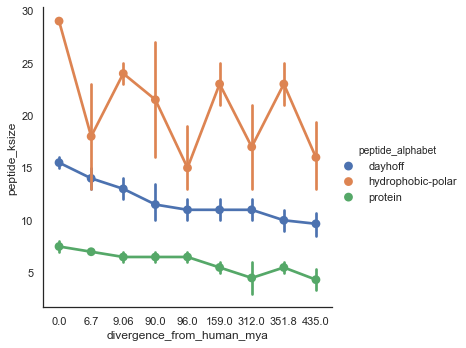

In [40]:
g = sns.factorplot(x='divergence_from_human_mya', y='peptide_ksize', data=bestF1, hue='peptide_alphabet')

In [41]:
bestF1.head()

species  divergence_from_human_mya   peptide_alphabet  \
7    Bos taurus                       96.0            dayhoff   
59   Bos taurus                       96.0            dayhoff   
105  Bos taurus                       96.0  hydrophobic-polar   
120  Bos taurus                       96.0  hydrophobic-polar   
156  Bos taurus                       96.0            protein   

    peptide_reference  peptide_ksize  \
7    Homo sapiens QfO             10   
59         Swiss Prot             12   
105  Homo sapiens QfO             21   
120        Swiss Prot             13   
156  Homo sapiens QfO              6   

                                  peptide_bloom_filter  jaccard_threshold  \
7    output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   
59   output_simreads/sencha/index/refsprot_t1e9_day...                0.5   
105  output_simreads/sencha/index/refHsapiens_QfO_t...                0.8   
120  output_simreads/sencha/index/refsprot_t1e9_hp_...                0.8   
156  output_simreads/sencha/index/refHsapiens_QfO_t...                0.5   

     true_positives  true_negatives  false_positives  false_negatives  \
7               479           262.0              238             21.0   
59              448           350.0              150             52.0   
105             442           230.0              270             58.0   
120             479           194.0              306             21.0   
156             380           438.0               62            120.0   

     precision  recall  F1_score  
7     0.668061   0.958  0.787182  
59    0.749164   0.896  0.816029  
105   0.620787   0.884  0.729373  
120   0.610191   0.958  0.745525  
156   0.859729   0.760  0.806794

In [43]:
bestF1_per_divergence = bestF1.groupby('divergence_from_human_mya').apply(lambda x: x.nlargest(1, 'F1_score') )
bestF1_per_divergence

species  \
divergence_from_human_mya                                 
0.00                      2158             Homo sapiens   
6.70                      3786          Pan troglodytes   
9.06                      1300  Gorilla gorilla gorilla   
90.00                     3281             Mus musculus   
96.00                     199                Bos taurus   
159.00                    2790    Monodelphis domestica   
312.00                    887             Gallus gallus   
351.80                    4186       Xenopus tropicalis   
435.00                    2554     Lepisosteus oculatus   

                                divergence_from_human_mya   peptide_alphabet  \
divergence_from_human_mya                                                      
0.00                      2158                       0.00            protein   
6.70                      3786                       6.70            protein   
9.06                      1300                       9.06            protein   
90.00                     3281                      90.00            protein   
96.00                     199                       96.00            protein   
159.00                    2790                     159.00            dayhoff   
312.00                    887                      312.00            dayhoff   
351.80                    4186                     351.80  hydrophobic-polar   
435.00                    2554                     435.00            dayhoff   

                               peptide_reference  peptide_ksize  \
divergence_from_human_mya                                         
0.00                      2158  Homo sapiens QfO              7   
6.70                      3786        Swiss Prot              7   
9.06                      1300        Swiss Prot              7   
90.00                     3281        Swiss Prot              7   
96.00                     199         Swiss Prot              7   
159.00                    2790        Swiss Prot             12   
312.00                    887         Swiss Prot             12   
351.80                    4186        Swiss Prot             25   
435.00                    2554        Swiss Prot             10   

                                                             peptide_bloom_filter  \
divergence_from_human_mya                                                           
0.00                      2158  output_simreads/sencha/index/refHsapiens_QfO_t...   
6.70                      3786  output_simreads/sencha/index/refsprot_t1e9_pro...   
9.06                      1300  output_simreads/sencha/index/refsprot_t1e9_pro...   
90.00                     3281  output_simreads/sencha/index/refsprot_t1e9_pro...   
96.00                     199   output_simreads/sencha/index/refsprot_t1e9_pro...   
159.00                    2790  output_simreads/sencha/index/refsprot_t1e9_day...   
312.00                    887   output_simreads/sencha/index/refsprot_t1e9_day...   
351.80                    4186  output_simreads/sencha/index/refsprot_t1e9_hp_...   
435.00                    2554  output_simreads/sencha/index/refsprot_t1e9_day...   

                                jaccard_threshold  true_positives  \
divergence_from_human_mya                                           
0.00                      2158                0.5             489   
6.70                      3786                0.5             450   
9.06                      1300                0.5             438   
90.00                     3281                0.5             433   
96.00                     199                 0.5             368   
159.00                    2790                0.5             372   
312.00                    887                 0.5             419   
351.80                    4186                0.8             440   
435.00                    2554                0.5             493   

                                true_negatives  false_positives  \
divergence_from_

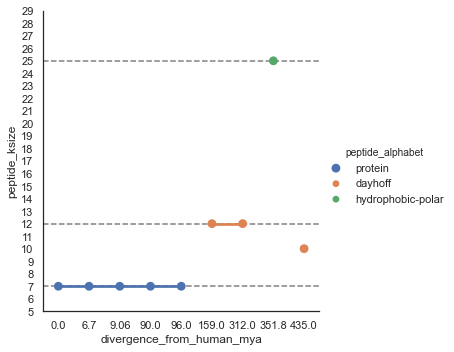

In [56]:
g = sns.catplot(x='divergence_from_human_mya', y='peptide_ksize', data=bestF1_per_divergence, 
                hue='peptide_alphabet', kind='point')

for ax in g.axes.flat:
    ax.set(yticks=np.arange(5, 30))
    
    line_kws = dict(color='grey', linestyle='--', zorder=-1)
    ax.axhline(7, **line_kws)
    ax.axhline(12, **line_kws)
    ax.axhline(25, **line_kws)
g.savefig('divergence_time__vs__peptide_ksize__best_f1_score.pdf')

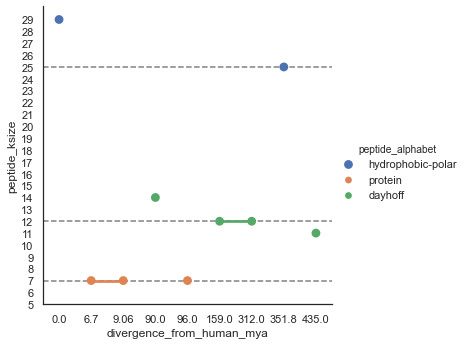

In [57]:
best_precision_per_divergence = bestF1.groupby('divergence_from_human_mya').apply(lambda x: x.nlargest(1, 'precision') )
display(HTML(best_precision_per_divergence.head().to_html()))


g = sns.catplot(x='divergence_from_human_mya', y='peptide_ksize', data=best_precision_per_divergence, 
                hue='peptide_alphabet', kind='point')

for ax in g.axes.flat:
    ax.set(yticks=np.arange(5, 30))
    
    line_kws = dict(color='grey', linestyle='--', zorder=-1)
    ax.axhline(7, **line_kws)
    ax.axhline(12, **line_kws)
    ax.axhline(25, **line_kws)
g.savefig('divergence_time__vs__peptide_ksize__best_precision.pdf')

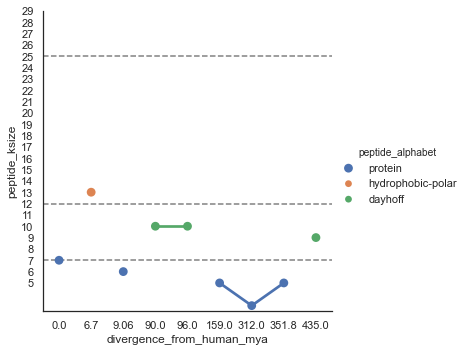

In [59]:
best_recall_per_divergence = bestF1.groupby('divergence_from_human_mya').apply(lambda x: x.nlargest(1, 'recall') )
display(HTML(best_recall_per_divergence.head().to_html()))


g = sns.catplot(x='divergence_from_human_mya', y='peptide_ksize', data=best_recall_per_divergence, 
                hue='peptide_alphabet', kind='point')

for ax in g.axes.flat:
    ax.set(yticks=np.arange(5, 30))
    
    line_kws = dict(color='grey', linestyle='--', zorder=-1)
    ax.axhline(7, **line_kws)
    ax.axhline(12, **line_kws)
    ax.axhline(25, **line_kws)
g.savefig('divergence_time__vs__peptide_ksize__best_recall.pdf')